# TRADITIONAL ALGORITHIMS OF ML

## IMPORT PACKAGES

In [1]:
import re
import pandas as pd
import sklearn.svm as svm
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from pickle import dump, load
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import nltk 
from nltk import download
download('wordnet')
download('omw-1.4')
download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## MODEL EVALUATION METRICS

In [2]:
def my_confusion_matrix(test_category, category_pred, model_name):
    labels = ['b', 'e', 'm', 't']
    conf = confusion_matrix(test_category, category_pred)
    cmd_obj = ConfusionMatrixDisplay(conf, display_labels=labels)
    cmd_obj.plot()
    cmd_obj.ax_.set(xlabel='Predicciones', ylabel='Valores reales')
    plt.title(f'Confussion matrix: {model_name}')
    plt.show()


def my_evaluation(test_category, category_pred, model_name):
    print(f"************* METRICS AVERAGE: {model_name} *************")
    print("Accuracy: ", accuracy_score(category_pred, test_category) * 100)
    print("Precision: ", precision_score(category_pred, test_category, average='macro') * 100)
    print("Recall: ", recall_score(category_pred, test_category, average='macro') * 100)
    print("f1: ", f1_score(category_pred, test_category, average='macro') * 100)
    print()
    print(f"************* METRICS BY CATEGORY {model_name} *************")
    print("Precision by cat.: ", precision_score(category_pred, test_category, average=None) * 100)
    print("Recall by cat.: ", recall_score(category_pred, test_category, average=None) * 100)
    print("f1 by cat.: ", f1_score(category_pred, test_category, average=None) * 100)
    print()

TEXT PREPROCESSING

There are two text preprocessing methods:
 
1.    **Simple text preprocessing**: simple form of pre-processing including filtering with regex, stopword removal and dimensionality reduction with lemmatisation
2.   **Complex text preprocessing**: Stricter text pre-processing. Include transformation of contractions and grammatical derivations into their full form. The changes come from observations made with Knowledge Graphs for Increment 4.



In [3]:
# SIMPLE TEXT PREPROCESSING
def preprocessing(text):
    text = text.lower()
    text_cleaned = re.sub(r'[^0-9a-z_+\-*]', ' ', text).strip()
    lemm = WordNetLemmatizer()
    title = []
    for token in text_cleaned.split():
        token_lemm = lemm.lemmatize(token)
        if token_lemm not in stopwords.words('english'):
             title.append(lemm.lemmatize(token))
    return ' '.join(str(elem) for elem in title)

In [ ]:
# COMPLEX TEXT PREPROCESSING
contr = {
    "aren't": "are not",
    "she'd": "she had",
    "can't": "cannot",
    "shouldn't": "should not",
    "couldn't": "could not",
    "that's": "that is",
    "didn't": "did not",
    "there's": "there is",
    "don't": "do not",
    "they're": "they are",
    "doesn't": "does not",
    "they've": "they have",
    "hadn't": "had not",
    "they'll": "they will",
    "haven't": "have not",
    "they'd": "they would",
    "he's": "he is",
    "they'd": "they had",
    "he's": "he has",
    "wasn't": "was not",
    "he'll": "he will",
    "we're": "we are",
    "he'd": "he would",
    "we've": "we have",
    "here's": "here is",
    "we'll": "we will",
    "i'm": "I am",
    "we'd": "we would",
    "i've": "I have",
    "we'd": "we had",
    "i'll": "I will",
    "weren't": "were not",
    "i'd": "I would",
    "what's": "what is",
    "i'd": "I had",
    "where's": "where is",
    "isn't": "is not",
    "who's": "who is",
    "it's": "it is",
    "who'll": "who will",
    "it's": "it has",
    "won't": "will not",
    "it's": "it has",
    "wouldn't": "would not",
    "it'll": "it will",
    "you're": "you are",
    "mustn't": "must not",
    "you've": "you have",
    "she's": "she is",
    "you'll": "you will",
    "she's": "she has",
    "you'd": "you would",
    "she'll": "she will",
    "you'd": "you had",
    "she'd": "she would"
}
capitonyms = {
    "US": "the United States of America",
    "Turkey": "turkish country",
    "Fiat": "the italian automobile manufacturer",
    "Conservative": "member of the conservative party",
    "Cat": "Catherine",
    "AM": "ante Meridiem"
}
abbreviations = {
    "dr.": "doctor",
    "assoc.": "association",
    "sr.": "senior",
    "st.": "saint"
}
def expand_dict(s, dict):
    exp = re.compile('(%s)' % '|'.join(dict.keys()))
    def replace(matcher):
        return dict[matcher.group(0)]
    return exp.sub(replace, s)
def preprocessing(text):
    text_c = expand_dict(text, capitonyms)
    text = text_c.lower()
    text_co = expand_dict(text, contr)
    text_cleaned = re.sub(r'[^0-9a-z_+\-*]', ' ', text_co).strip()
    lemm = WordNetLemmatizer()
    title = []
    for token in text_cleaned.split():
        token_lemm = lemm.lemmatize(token)
        if token_lemm not in stopwords.words('english'):
             title.append(lemm.lemmatize(token))
    return ' '.join(str(elem) for elem in title)


##IMPORT DATA FROM LOCAL FILES
Files to upload:
- test_category.csv
- test_data.csv
- train_category.csv
- train_data.csv

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test_category.csv to test_category.csv
Saving test_data.csv to test_data.csv
Saving train_category.csv to train_category.csv
Saving train_data.csv to train_data.csv


In [5]:
train_data_df = pd.read_csv('/content/train_data.csv')
test_data_df = pd.read_csv('/content/test_data.csv')
train_category_df = pd.read_csv('/content/train_category.csv')
test_category_df = pd.read_csv('/content/test_category.csv')

In [6]:
train_data = train_data_df['headline']
test_data = test_data_df['headline']
train_label = train_category_df['labels'] 
test_label = test_category_df['labels']

## DATA PREPARATION

In [7]:
train_data = train_data.apply(lambda x: preprocessing(str(x)))
test_data = test_data.apply(lambda x: preprocessing(str(x)))

In [8]:
encoder = LabelEncoder()
train_label = encoder.fit_transform(train_label)
test_label = encoder.fit_transform(test_label)

In [9]:
tfidf_vector = TfidfVectorizer()
tfidf_vector.fit(train_data)
train_data_tfidf = tfidf_vector.transform(train_data)
test_data_tfidf = tfidf_vector.transform(test_data)

## MODEL CREATION, TRAINING AND PREDICTIONS

In [10]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, max_features='log2'),
    "MNB": MultinomialNB(alpha=1),
    "SVM": svm.SVC(gamma=1, C=10),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [11]:
models["Random Forest"].fit(train_data_tfidf, train_label)
models["MNB"].fit(train_data_tfidf, train_label)
models["SVM"].fit(train_data_tfidf, train_label)
models["KNN"].fit(train_data_tfidf, train_label)

KNeighborsClassifier()

In [12]:
label_pred = {}
label_pred["Random Forest"] = models["Random Forest"].predict(test_data_tfidf)
label_pred["MNB"] = models["MNB"].predict(test_data_tfidf)
label_pred["SVM"] = models["SVM"].predict(test_data_tfidf)
label_pred["KNN"] = models["KNN"].predict(test_data_tfidf)

## MODEL EVALUATION


*   Confusion Matrix
*   Metrics: accuracy / recall / precision / F1-score



------------------- Model: Random Forest -----------------


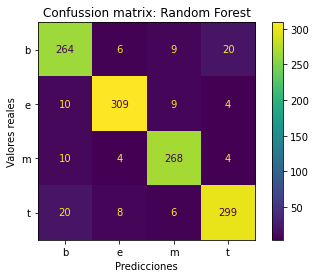

************* METRICS AVERAGE: Random Forest *************
Accuracy:  91.2
Precision:  91.21567175849522
Recall:  91.1389122233761
f1:  91.17006646873283

************* METRICS BY CATEGORY Random Forest *************
Precision by cat.:  [88.29431438 93.07228916 93.70629371 89.78978979]
Recall by cat.:  [86.84210526 94.49541284 91.78082192 91.43730887]
f1 by cat.:  [87.56218905 93.7784522  92.73356401 90.60606061]

------------------- Model: MNB -----------------


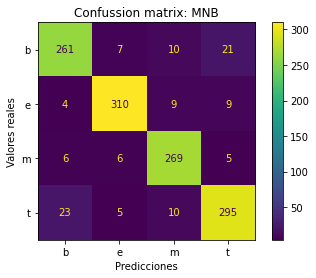

************* METRICS AVERAGE: MNB *************
Accuracy:  90.8
Precision:  90.82724913002545
Recall:  90.73752527395278
f1:  90.76977624787455

************* METRICS BY CATEGORY MNB *************
Precision by cat.:  [87.2909699  93.37349398 94.05594406 88.58858859]
Recall by cat.:  [88.7755102  94.51219512 90.26845638 89.39393939]
f1 by cat.:  [88.02698145 93.93939394 92.12328767 88.98944193]

------------------- Model: SVM -----------------


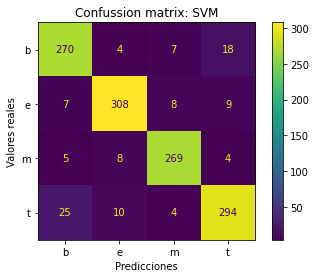

************* METRICS AVERAGE: SVM *************
Accuracy:  91.28
Precision:  91.35408000651583
Recall:  91.28638307720148
f1:  91.31254888297018

************* METRICS BY CATEGORY SVM *************
Precision by cat.:  [90.30100334 92.77108434 94.05594406 88.28828829]
Recall by cat.:  [87.94788274 93.33333333 93.40277778 90.46153846]
f1 by cat.:  [89.10891089 93.05135952 93.728223   89.36170213]

------------------- Model: KNN -----------------


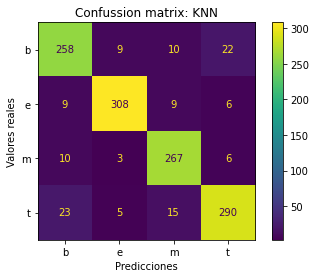

************* METRICS AVERAGE: KNN *************
Accuracy:  89.84
Precision:  89.87561004978501
Recall:  89.74493063640351
f1:  89.7885464059284

************* METRICS BY CATEGORY KNN *************
Precision by cat.:  [86.28762542 92.77108434 93.35664336 87.08708709]
Recall by cat.:  [86.         94.76923077 88.70431894 89.50617284]
f1 by cat.:  [86.14357262 93.75951294 90.97103918 88.28006088]



In [13]:
for model_name in label_pred:
    print(f"------------------- Model: {model_name} -----------------")
    my_confusion_matrix(test_label, label_pred[model_name], model_name)
    my_evaluation(test_label, label_pred[model_name], model_name)